<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/estadistica/02_linear_regression_using_least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Using Least Squares

Este artículo forma parte de una serie titulada "Linear Regression for Data Science".  
Se compone de tres artículos siendo este el primero:
1. Linear Regression Using Least Squares (← este artículo)
2. Linear Regression Using the Gradient Descent Algorithm
3. Logarithmic, Exponential, and Polynomial Linear Regression

# **1. Introducción**

En Machine Learning, se aconseja comenzar programando un algoritmo de regresión lineal, ya que además de formativo se continúa usando a nivel empresarial en Data Science. Pero ¿por qué sigue siendo tan relevante en la era de los chat bots y las redes neuronales?

La respuesta es simple: **efectividad y interpretabilidad**. Mientras que modelos más complejos pueden actuar como "cajas negras", la regresión lineal nos permite entender exactamente cómo cada variable afecta a nuestro resultado. Es nuestro punto de partida natural para cualquier problema de predicción numérica.

## ¿Qué problema resuelve realmente?

Imagina que tienes datos históricos de precios de viviendas y quieres predecir cuánto costará una nueva casa. Tienes variables como metros cuadrados, número de habitaciones, ubicación... La regresión lineal te permite encontrar una relación matemática entre estas características y el precio.

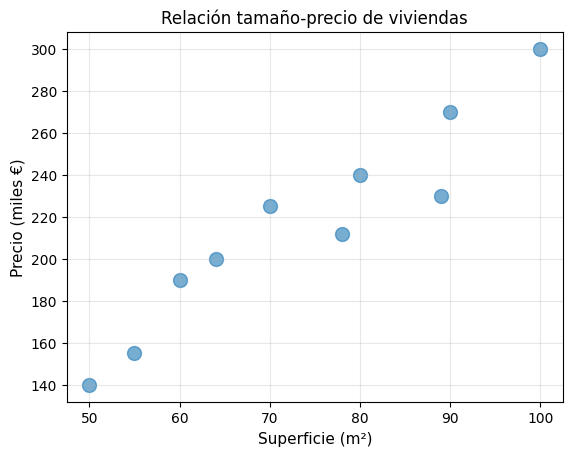

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: tamaño de casa vs precio
superficie = np.array([50, 55, 60, 64, 70, 78, 80, 89, 90, 100])
precio = np.array([140000, 155000, 190000, 200000, 225000, 212000 ,240000, 230000 ,270000, 300000])

plt.scatter(superficie, precio/1000, alpha=0.6, s=100)
plt.xlabel('Superficie (m²)', fontsize=11)
plt.ylabel('Precio (miles €)', fontsize=11)
plt.title('Relación tamaño-precio de viviendas', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

El **método de mínimos cuadrados** (Ordinary Least Squares, OLS) resuelve un problema aparentemente sencillo: dada una nube de puntos, queremos encontrar la recta (o hiperplano) que mejor se ajuste a los datos. "Mejor" aquí significa minimizar la suma de los errores cuadráticos entre las predicciones y los valores reales.

# **2. Planteamiento general del problema de Regresión**

Ahora que entendemos por qué la regresión lineal es tan útil, vamos a formalizar matemáticamente el problema. Comenzaremos con el caso más simple de una sola variable ($x$) para construir la intuición antes de generalizar al caso multivariable.

## Caso simple: una variable independiente

Empecemos con lo básico. Cuando tenemos solo una variable predictora $x$, queremos encontrar la recta que mejor se ajuste a nuestros datos:

$$
\begin{array}{lcl}
y = w_0 + w_1 x + e         & \longrightarrow & \text{modelo real con error} \\
\hat{y} = w_0 + w_1 x       & \longrightarrow & \text{modelo estimado}
\end{array}
$$

Donde:
- $\hat{y}$ → el **valor predicho** por el modelo, es la $y$ estimada (precio)
- $x$ → variable predictora (superficie)
- $w_0$ → **intercepto** (término independiente o bias)
- $w_1$ → **pendiente** (coeficiente de la variable)
- $e$ → **error o residuo**: la diferencia entre el valor real y lo que predice el modelo

El error de cada predicción es:

\begin{align*}
e_i &= y_i - \hat{y}_i \\
e_i &= y_i - (w_0 + w_1 x_i)
\end{align*}


Nuestro objetivo es encontrar $w_0$ y $w_1$ que minimicen estos errores.

## El método de Mínimos Cuadrados

En lugar de usar los errores directamente trabajamos con los **errores al cuadrado**. Definimos la función de coste:

$$J(w_0, w_1) = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} [y_i - (w_0 + w_1 x_i)]^2$$

**¿Por qué al cuadrado?** Por tres razones principales:
- Evita que errores positivos y negativos se cancelen
- Penaliza más los errores grandes (lo que suele ser deseable)
- Obtenemos una función diferenciable y convexa, lo que facilita encontrar el mínimo

### El Error Cuadrático Medio (MSE)

La función $J$ simplemente suma los errores al cuadrado, pero si calculamos la media habremos obtenido el Error Cuadrático Medio (MSE).

$$\text{MSE}(w) = \frac{1}{n} \sum_{i=1}^{n}e_i^2 = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n}(y_i - (w_0 + w_1 x_i))^2$$




Veámoslo gráficamente con nuestros datos de viviendas:

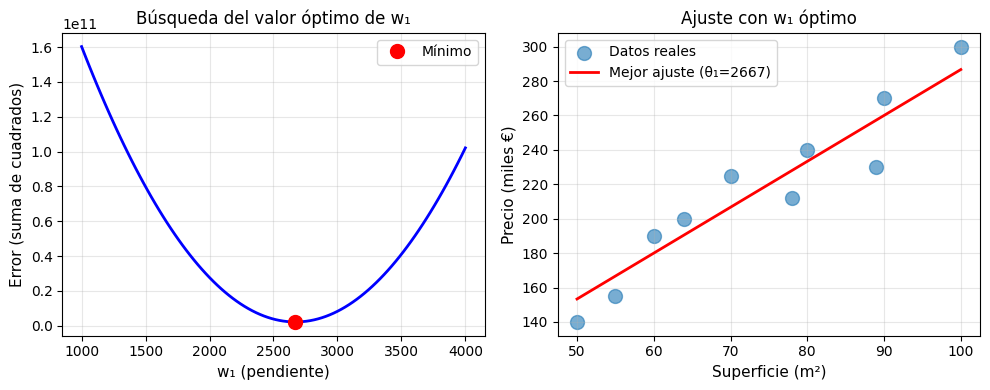


w₁ óptimo encontrado: 2666.67€/m²
Error mínimo (MSE): 2.16e+09


In [ ]:
# Visualización de cómo varía el error con diferentes valores de w1
def calcular_error(w0, w1, x, y):
    y_pred = w0 + w1 * x
    return np.sum((y - y_pred)**2)

# Calculamos el error para diferentes valores de w1
w1_vals = np.linspace(1000, 4000, 100)
w0_fijo = 20_000  # Valor fijo para visualización
errores = [calcular_error(w0_fijo, w1, superficie, precio) for w1 in w1_vals]

plt.figure(figsize=(10, 4))

# Gráfico del error vs w1
plt.subplot(1, 2, 1)
plt.plot(w1_vals, errores, 'b-', linewidth=2)
min_idx = np.argmin(errores)
plt.plot(w1_vals[min_idx], errores[min_idx], 'ro', markersize=10, label='Mínimo')
plt.xlabel('w₁ (pendiente)', fontsize=11)
plt.ylabel('Error (suma de cuadrados)', fontsize=11)
plt.title('Búsqueda del valor óptimo de w₁', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Gráfico con mejor ajuste
plt.subplot(1, 2, 2)
mejor_w1 = w1_vals[min_idx]
y_pred = w0_fijo + mejor_w1 * superficie
plt.scatter(superficie, precio/1000, alpha=0.6, s=100, label='Datos reales')
plt.plot(superficie, y_pred/1000, 'r-', linewidth=2, label=f'Mejor ajuste (θ₁={mejor_w1:.0f})')
plt.xlabel('Superficie (m²)', fontsize=11)
plt.ylabel('Precio (miles €)', fontsize=11)
plt.title('Ajuste con w₁ óptimo', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nw₁ óptimo encontrado: {mejor_w1:.2f}€/m²")
print(f"Error mínimo (MSE): {errores[min_idx]:.2e}")

### Visualización de los errores

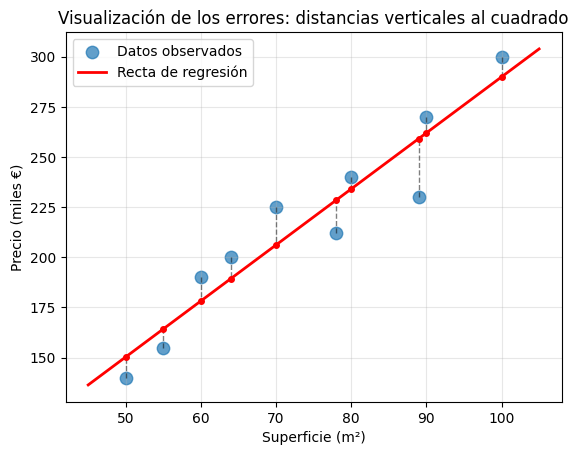

In [ ]:
plt.scatter(superficie, precio/1000, alpha=0.7, s=80, label='Datos observados')

# Primero calculamos los coeficientes para la recta
X = np.column_stack([np.ones(len(superficie)), superficie])
w = np.linalg.inv(X.T @ X) @ X.T @ precio

# Recta de regresión
superficie_range = np.linspace(45, 105, 100)
precio_range = w[0] + w[1] * superficie_range
plt.plot(superficie_range, precio_range/1000, 'r-', linewidth=2, label='Recta de regresión')

# Dibujar líneas de error (distancias verticales)
for i in range(len(superficie)):
    y_pred = w[0] + w[1] * superficie[i]
    plt.plot([superficie[i], superficie[i]],
             [precio[i]/1000, y_pred/1000],
             'k--', alpha=0.5, linewidth=1)
    # Puntos predichos
    plt.plot(superficie[i], y_pred/1000, 'ro', markersize=4)

plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles €)')
plt.title('Visualización de los errores: distancias verticales al cuadrado')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Cada línea discontinua representa un error $e_i$. El método de mínimos cuadrados encuentra la recta que **minimiza la suma de los cuadrados de todas estas distancias verticales**.

---
### Minimizando el error

El método encuentra los valores óptimos derivando e igualando a cero:

$$\frac{\partial J}{\partial w_0} = 0, \quad \frac{\partial J}{\partial w_1} = 0$$

Esto nos da las **ecuaciones normales**, cuya solución es:

$$w_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$w_0 = \bar{y} - w_1 \bar{x}$$

Donde $\bar{x}$ y $\bar{y}$ son las medias de $x$ e $y$ respectivamente.

Estas fórmulas funcionan perfectamente para una variable, pero ¿qué pasa cuando tenemos múltiples características? Aquí es donde la notación matricial se vuelve indispensable.

## Generalización a múltiples variables: notación matricial

Cuando tenemos múltiples variables predictoras $(x_1, x_2, \dots, x_n)$, el modelo se extiende naturalmente. En lugar de una recta, ahora buscamos un **hiperplano**:

$$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n$$

Aquí es donde la **notación matricial** hace la vida más fácil. Representamos nuestros datos como:

$$\mathbf{X} = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1n} \\
1 & x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}, \quad
\mathbf{w} = \begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_n
\end{bmatrix}, \quad
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}$$

**¡Ojo con la columna de unos!** Es crucial incluirla en $\mathbf{X}$ para representar el término independiente $w_0$.

Nuestro modelo se escribe elegantemente como:

$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w}$$

Y la solución óptima viene dada por las **ecuaciones normales** en forma matricial:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Esta fórmula nos da directamente los coeficientes óptimos sin necesidad de iterar. ¡Es como tener la respuesta de un problema de optimización sin tener que buscarla!

**¿Por qué esta notación es tan poderosa?** Porque nos permite tratar casos simples y complejos con el mismo framework matemático, y porque las operaciones matriciales son computacionalmente eficientes en NumPy.

---

# **3. Implementación con Mínimos Cuadrados**

## De la teoría a la práctica

Procedemos a implementar la solución de mínimos cuadrados desde cero, aplicando los conceptos teóricos desarrollados anteriormente a nuestro dataset de precios de viviendas.

La formulación matricial que derivamos:

$$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Se implementa eficientemente utilizando operaciones matriciales en NumPy.

## Construcción de la matriz de diseño

La implementación correcta requiere incluir una columna de unos para el término independiente:

In [ ]:
# Usamos los datos de precio y superficie del ejemplo inicial

# Matriz X con columna de unos para el intercept
X = np.column_stack([np.ones(len(superficie)), superficie])
y = precio

print("Matriz de diseño X:")
print(X)
print(f"\nDimensiones: {X.shape} - {X.shape[0]} observaciones, {X.shape[1]} características")

Matriz de diseño X:
[[  1.  50.]
 [  1.  55.]
 [  1.  60.]
 [  1.  64.]
 [  1.  70.]
 [  1.  78.]
 [  1.  80.]
 [  1.  89.]
 [  1.  90.]
 [  1. 100.]]

Dimensiones: (10, 2) - 10 observaciones, 2 características


## Implementación del algoritmo

In [ ]:
def minimos_cuadrados(X, y):
    """Calcula los coeficientes óptimos usando mínimos cuadrados ordinarios"""
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Cálculo de coeficientes
w = minimos_cuadrados(X, y)

print("Coeficientes del modelo:")
print(f"w_0 (intercept): {w[0]:.2f} €")
print(f"w_1 (pendiente): {w[1]:.2f} €/m²")

Coeficientes del modelo:
w_0 (intercept): 10722.85 €
w_1 (pendiente): 2791.81 €/m²


**Interpretación de coeficientes:**
- **Pendiente (2,791.81 €/m²)**: Por cada metro cuadrado adicional, el precio aumenta aproximadamente 2,792 €
- **Intercept (10,722.85 €)**: Representa el valor base de la vivienda (cuando la superficie es 0 m²)

## Visualización del ajuste

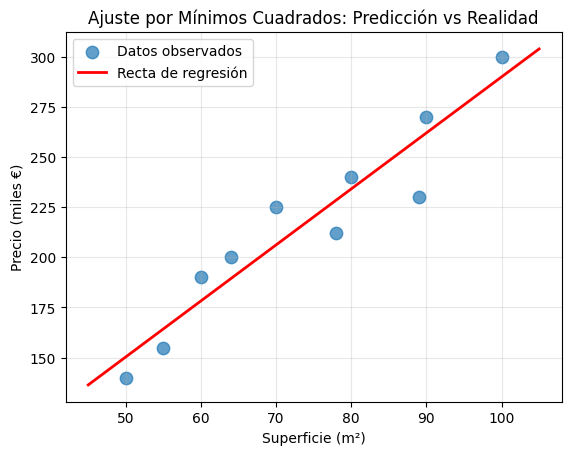

In [ ]:
# Predicciones del modelo
precio_predicho = X @ w

# Visualización
plt.scatter(superficie, precio/1000, alpha=0.7, s=80, label='Datos observados')

# Recta de regresión
superficie_range = np.linspace(45, 105, 100)
precio_range = w[0] + w[1] * superficie_range
plt.plot(superficie_range, precio_range/1000, 'r-', linewidth=2,
         label='Recta de regresión')

plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles €)')
plt.title('Ajuste por Mínimos Cuadrados: Predicción vs Realidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Evaluación del modelo

Para evaluar qué tan bien funciona nuestro modelo, utilizamos dos métricas fundamentales:

**RMSE (Root Mean Square Error)**: Es la raíz cuadrada del MSE y nos dice el error promedio en las mismas unidades que nuestra variable objetivo (euros). Un RMSE bajo indica predicciones más precisas.

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

**R² (Coeficiente de Determinación)**: Indica qué proporción de la variabilidad de los datos es explicada por nuestro modelo. Varía entre 0 y 1, donde 1 significa ajuste perfecto.

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

In [ ]:
# Calculamos el error cuadrático medio (MSE) y RMSE
mse = np.mean((precio - precio_predicho) ** 2)
rmse = np.sqrt(mse)

# Coeficiente de determinación R²
ss_res = np.sum((precio - precio_predicho) ** 2)  # Suma de cuadrados de residuos
ss_tot = np.sum((precio - precio.mean()) ** 2)    # Suma total de cuadrados
r2 = 1 - (ss_res / ss_tot)

# Métricas de rendimiento
print("\n" + "="*50)
print("MÉTRICAS DE RENDIMIENTO")
print("="*50)
print(f"R² (coeficiente de determinación): {r2:.3f}")
print(f"  → El modelo explica el {r2*100:.1f}% de la variabilidad")
print(f"\nRMSE (error cuadrático medio):    {rmse:,.2f}€")
print(f"  → Error promedio de {rmse:,.0f} € en las predicciones")


MÉTRICAS DE RENDIMIENTO
R² (coeficiente de determinación): 0.900
  → El modelo explica el 90.0% de la variabilidad

RMSE (error cuadrático medio):    14,573.71€
  → Error promedio de 14,574 € en las predicciones


Un $R^2$ de 0.9 indica que nuestro modelo es excelente, explicando el 90% de la variabilidad en los precios. Sin embargo, el RMSE de ~14.5k€ nos recuerda que aún hay margen de error considerable en las predicciones individuales.

## Haciendo predicciones

In [ ]:
# Predicciones para nuevas casas
nuevas_superficies = np.array([65, 85, 95])
predicciones = w[0] + w[1] * nuevas_superficies

print("\nPREDICCIONES PARA NUEVAS VIVIENDAS")
print("-" * 34)
for sup, pred in zip(nuevas_superficies, predicciones):
    print(f"   Casa de {sup}m²  →  {pred:,.0f}€")


PREDICCIONES PARA NUEVAS VIVIENDAS
----------------------------------
   Casa de 65m²  →  192,190€
   Casa de 85m²  →  248,027€
   Casa de 95m²  →  275,945€


## Comparación con scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

# Creamos y entrenamos el modelo
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(superficie.reshape(-1, 1), precio)

# Comparamos resultados
print("\n" + "="*60)
print("COMPARACIÓN: Nuestra Implementación vs scikit-learn")
print("="*60)
print(f"\n{'Parámetro':<25} {'Nuestra impl.':<20} {'scikit-learn':<20}")
print("-" * 60)
print(f"{'w₀ (intercepto)':<25} {w[0]:>15,.2f}€   {modelo_sklearn.intercept_:>15,.2f}€")
print(f"{'w₁ (pendiente)':<25} {w[1]:>15,.2f}€/m² {modelo_sklearn.coef_[0]:>14,.2f}€/m²")
print("\n¡Los resultados son idénticos! ✓")


COMPARACIÓN: Nuestra Implementación vs scikit-learn

Parámetro                 Nuestra impl.        scikit-learn        
------------------------------------------------------------
w₀ (intercepto)                 10,722.85€         10,722.85€
w₁ (pendiente)                   2,791.81€/m²       2,791.81€/m²

¡Los resultados son idénticos! ✓


# **4. Ventajas, Limitaciones y Cuándo Usarlo**

## Ventajas del método de mínimos cuadrados

- **Solución exacta**: Encuentra los coeficientes óptimos directamente, sin iteraciones
- **Rápido y eficiente**: Para datasets pequeños y medianos, es computacionalmente muy eficiente
- **Interpretabilidad**: Los coeficientes tienen una interpretación directa y clara
- **Garantía matemática**: Si existe solución, este método la encuentra
- **Sin hiperparámetros**: No requiere ajuste de learning rate u otros parámetros

## Limitaciones importantes

In [ ]:
# Ejemplo de problema con multicolinealidad
X_problema = np.column_stack([superficie, superficie * 2])  # Columnas linealmente dependientes
print("Matriz con columnas linealmente dependientes:")
print(X_problema[:3])
print(f"\nDeterminante de X.T @ X: {np.linalg.det(X_problema.T @ X_problema):.10f}")
print("Un determinante cercano a 0 indica problemas de inversión matricial")

Matriz con columnas linealmente dependientes:
[[ 50 100]
 [ 55 110]
 [ 60 120]]

Determinante de X.T @ X: 0.0000000000
Un determinante cercano a 0 indica problemas de inversión matricial


**Problemas comunes:**
- **Matrices singulares**: Cuando las variables son linealmente dependientes
- **Multicolinealidad**: Variables predictoras muy correlacionadas entre sí
- **No escala bien**: Para datasets muy grandes (millones de registros), la inversión de matriz se vuelve costosa ($O(n^3)$)
- **Sensibilidad a outliers**: Los errores al cuadrado amplifican el efecto de valores atípicos

Ahora que conocemos las limitaciones del método, surge la pregunta natural: ¿cuándo debemos usar mínimos cuadrados y cuándo recurrir a alternativas como Gradient Descent?

## ¿Cuándo usar mínimos cuadrados vs Gradient Descent?

**Usa mínimos cuadrados cuando:**
- Tienes < 10,000 muestras y < 100 características
- Necesitas la solución exacta en una sola operación
- El dataset cabe cómodamente en memoria RAM

**Usa Gradient Descent cuando:**
- Tienes millones de registros o cientos de características
- El dataset no cabe en memoria (puedes usar mini-batches)
- Necesitas actualizar el modelo con nuevos datos continuamente
- Trabajas con redes neuronales u otros modelos no lineales

---

# **5. Conclusión**

Hemos visto cómo el método de mínimos cuadrados nos permite encontrar la mejor recta que se ajusta a nuestros datos mediante una solución matemática elegante y directa.

**En resumen:**
- **Fácil de implementar** con pocas líneas de código
- **Resultados interpretables** que podemos explicar a cualquier stakeholder
- **Extremadamente efectivo** para problemas con relaciones lineales
- **Base fundamental** para entender métodos más complejos

**Próximos pasos:** En el siguiente artículo de esta serie, exploraremos el **algoritmo de Gradient Descent**, que nos permitirá escalar a problemas más grandes, allanando el camino hacia técnicas más avanzadas de Machine Learning.